In [2]:
from IPython.core.display import display, HTML, Javascript

# ----- Notebook Theme -----
color_map = ['#f4a261', '#e8f6f3', '#d0ece7', '#a2d9ce', '#73c6b6', '#45b39d', 
                        '#16a085', '#138d75', '#117a65', '#0e6655', '#e76f51']

prompt = color_map[-1]
main_color = color_map[0]
strong_main_color = color_map[1]
custom_colors = [strong_main_color, main_color]

css_file = ''' 

div #notebook {
background-color: white;
line-height: 20px;
}

#notebook-container {
%s
margin-top: 2em;
padding-top: 2em;
border-top: 4px solid %s; /* light orange */
-webkit-box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5); /* pink */
    box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5); /* pink */
}

div .input {
margin-bottom: 1em;
}

.rendered_html h1, .rendered_html h2, .rendered_html h3, .rendered_html h4, .rendered_html h5, .rendered_html h6 {
color: %s; /* light orange */
font-weight: 600;
}

div.input_area {
border: none;
    background-color: %s; /* rgba(229, 143, 101, 0.1); light orange [exactly #E58F65] */
    border-top: 2px solid %s; /* light orange */
}

div.input_prompt {
color: %s; /* light blue */
}

div.output_prompt {
color: %s; /* strong orange */
}

div.cell.selected:before, div.cell.selected.jupyter-soft-selected:before {
background: %s; /* light orange */
}

div.cell.selected, div.cell.selected.jupyter-soft-selected {
    border-color: %s; /* light orange */
}

.edit_mode div.cell.selected:before {
background: %s; /* light orange */
}

.edit_mode div.cell.selected {
border-color: %s; /* light orange */

}
'''
def to_rgb(h): 
    return tuple(int(h[i:i+2], 16) for i in [0, 2, 4])

main_color_rgba = 'rgba(%s, %s, %s, 0.1)' % (to_rgb(main_color[1:]))
open('notebook.css', 'w').write(css_file % ('width: 95%;', main_color, main_color, main_color_rgba, main_color,  main_color, prompt, main_color, main_color, main_color, main_color))

def nb(): 
    return HTML("<style>" + open("notebook.css", "r").read() + "</style>")
nb()

/tmp/ipykernel_7001/3285560643.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML, Javascript


In [1]:
import pandas as pd
import numpy as np

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('../src/data/interactions.csv')
df_users = pd.read_csv('../src/data/users.csv')
df_items = pd.read_csv('../src/data/items.csv')

In [22]:
df

,user_id,item_id,progress,rating,start_date
0,126706,14433,80,NaN,2018-01-01
1,127290,140952,58,NaN,2018-01-01
2,66991,198453,89,NaN,2018-01-01
3,46791,83486,23,5.0,2018-01-01
4,79313,188770,88,5.0,2018-01-01
...,...,...,...,...,...
1533073,76968,285394,95,NaN,2019-12-31
1533074,153877,285394,76,5.0,2019-12-31
1533075,90021,73789,97,NaN,2019-12-31
1533076,6452,77993,39,NaN,2019-12-31


In [51]:
df_items.head()

,id,title,genres,authors,year
0,128115,Ворон-челобитчик,"Зарубежные детские книги,Сказки,Зарубежная кла...",Михаил Салтыков-Щедрин,1886
1,210979,Скрипка Ротшильда,"Классическая проза,Литература 19 века,Русская ...",Антон Чехов,1894
2,95632,Испорченные дети,"Зарубежная классика,Классическая проза,Литерат...",Михаил Салтыков-Щедрин,1869
3,247906,Странный человек,"Пьесы и драматургия,Литература 19 века",Михаил Лермонтов,1831
4,294280,Господа ташкентцы,"Зарубежная классика,Классическая проза,Литерат...",Михаил Салтыков-Щедрин,1873


# Аналитика


## Кто наши основные пользователи?

In [36]:
#!pip install matplotlib
#!pip install seaborn

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)


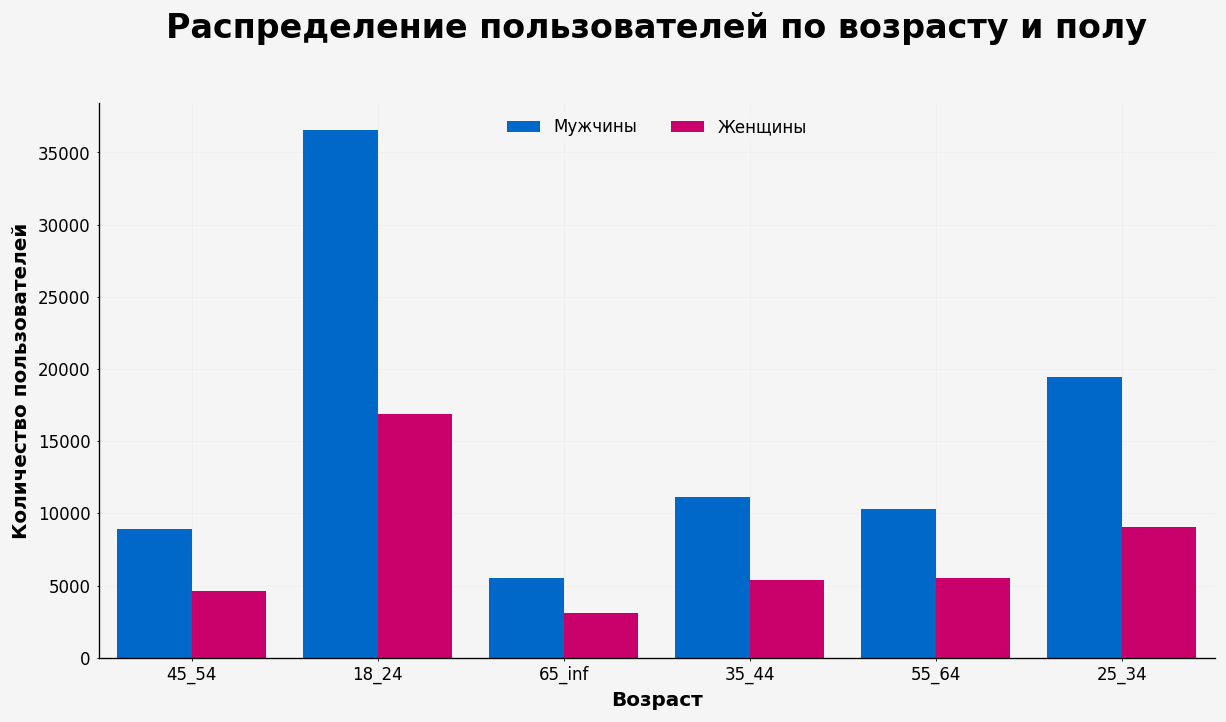

In [6]:
import seaborn as sns
from matplotlib import pyplot as plt 

# Создание графика
plt.rcParams['figure.dpi'] = 120
fig = plt.figure(figsize=(12, 6), facecolor='#f6f5f5')
background_color = "#f6f5f5"
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.4, hspace=0.2)
ax0 = fig.add_subplot(gs[0, 0])
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
ax0.set_facecolor(background_color)

ax0_sns = sns.countplot(ax=ax0, x='age', hue='sex', data=df_users, palette=['#0068c9', '#c9006b'], saturation=1, linewidth=0, zorder=2)
ax0_sns.set_xlabel('Возраст', fontsize=12, fontweight='bold')
ax0_sns.set_ylabel('Количество пользователей', fontsize=12, fontweight='bold')
ax0_sns.tick_params(labelsize=10, width=0.5, length=1.5)
ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
# Настройка легенды
ax0_sns.legend(['Мужчины', 'Женщины'], fontsize=10, ncol=2, loc='upper center', facecolor=background_color, edgecolor=background_color)

plt.title('Распределение пользователей по возрасту и полу', fontsize=20, fontweight='bold', y=1.10)

# Отображение графика
plt.show()


In [7]:
import pandas as pd


# Группировка данных
df_grouped = df_merged.groupby(['age', 'sex'])[['progress', 'rating']].mean()

# Вывод результата
print(df_grouped)


             progress    rating
age    sex                     
18_24  0.0  45.565741  4.618551
       1.0  44.356996  4.614404
25_34  0.0  48.390439  4.611819
       1.0  47.041480  4.597734
35_44  0.0  49.470341  4.617775
       1.0  46.985242  4.564111
45_54  0.0  50.653962  4.577381
       1.0  49.301899  4.604317
55_64  0.0  52.266832  4.497678
       1.0  48.540460  4.533316
65_inf 0.0  51.505589  4.576918
       1.0  45.687778  4.451341


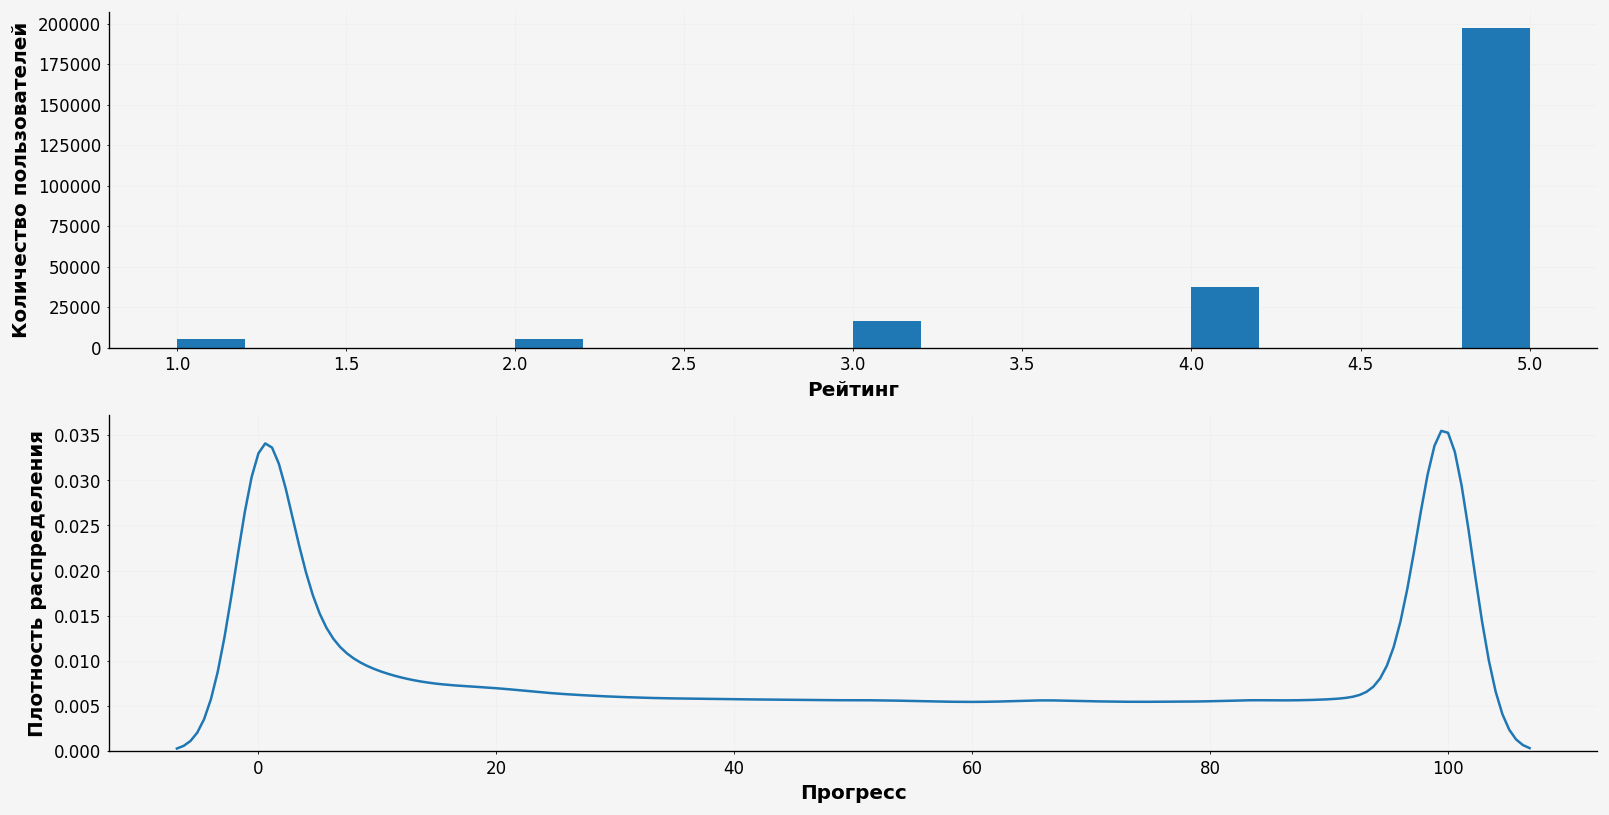

In [21]:
import seaborn as sns

# Создание графика
fig = plt.figure(figsize=(16, 8), facecolor="#f6f5f5")
gs = fig.add_gridspec(2, 1)
gs.update(wspace=0.4, hspace=0.2)

background_color = "#f6f5f5"

# Объединение датафреймов
df_merged = pd.merge(df, df_users, on="user_id")

# Построение гистограмм
ax0 = fig.add_subplot(gs[0, 0])
ax0_sns = sns.histplot(
    ax=ax0,
    data=df_merged,
    x="rating",
    linewidth=0,
    alpha=1,
    zorder=2,
)

ax0_sns.set_xlabel("Рейтинг", fontsize=12, fontweight="bold")
ax0_sns.set_ylabel("Количество пользователей", fontsize=12, fontweight="bold")
ax0_sns.tick_params(labelsize=10, width=0.5, length=1.5)
ax0_sns.grid(which="major", axis="x", zorder=0, color="#EEEEEE", linewidth=0.4)
ax0_sns.grid(which="major", axis="y", zorder=0, color="#EEEEEE", linewidth=0.4)

ax1 = fig.add_subplot(gs[1, 0])
ax1_sns = sns.kdeplot(
    ax=ax1, data=df_merged, x="progress", alpha=1,
)
ax1_sns.set_xlabel("Прогресс", fontsize=12, fontweight="bold")
ax1_sns.set_ylabel("Плотность распределения", fontsize=12, fontweight="bold")
ax1_sns.tick_params(labelsize=10, width=0.5, length=1.5)
ax1_sns.grid(which="major", axis="x", zorder=0, color="#EEEEEE", linewidth=0.4)
ax1_sns.grid(which="major", axis="y", zorder=0, color="#EEEEEE", linewidth=0.4)

for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)


## Какие жанры предпочитают пользователи?

In [30]:
merged_df = pd.merge(df, df_items, left_on='item_id', right_on='id')
merged_df['genre'] = merged_df['genres'].str.split(', ')
unique_genres = merged_df.explode('genre')['genre'].unique()

# Самые залайканные жанры
top_genres = merged_df.explode('genre').groupby('genre')['rating'].sum().sort_values(ascending=False)

# Самые популярные жанры по дням
daily_views = merged_df.explode('genre')
daily_views['start_date'] = pd.to_datetime(daily_views['start_date'])
daily_views = daily_views.groupby(['genre', pd.Grouper(key='start_date', freq='D')])['user_id'].nunique().reset_index()
top_daily_views = daily_views.groupby('genre')['user_id'].sum().sort_values(ascending=False)
display(top_genres)
display(top_daily_views)

genre
Современные детективы                                                                              51879.0
Современная русская литература                                                                     50835.0
Иронические детективы                                                                              33180.0
Зарубежные любовные романы,Короткие любовные романы                                                27738.0
Любовное фэнтези                                                                                   21989.0
                                                                                                    ...   
Французский язык,Зарубежная классика,Литература 19 века,Классические любовные романы                   0.0
Музыка,Афоризмы и цитаты,Биографии и мемуары                                                           0.0
Французский язык,Детская проза,Зарубежная классика                                                     0.0
Фольклор,Французский язык,Европ

genre
Современная русская литература                                           58578
Современные детективы                                                    42897
Иронические детективы                                                    22283
Современная зарубежная литература                                        21506
Зарубежные любовные романы,Короткие любовные романы                      19798
                                                                         ...  
Стимпанк,Детективное фэнтези,Историческая фантастика,Любовное фэнтези        5
Управление персоналом,Коучинг                                                4
Учебники и пособия для вузов,Органы юстиции,Правоведение                     4
Военное дело,Документальная литература,Публицистика                          4
Издательское дело,Биографии и мемуары,Документальная литература              3
Name: user_id, Length: 10782, dtype: int64

In [ ]:
df_users[df_users["user_id"] == 2].values.squeeze()

array([2, '18_24', 0.0], dtype=object)

In [ ]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142888 entries, 0 to 142887
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  142888 non-null  int64  
 1   age      142742 non-null  object 
 2   sex      136626 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.3+ MB


In [ ]:
df_users.head()

,user_id,age,sex
0,1,45_54,NaN
1,2,18_24,0.0
2,3,65_inf,0.0
3,4,18_24,0.0
4,5,35_44,0.0


In [ ]:
df_items.head()

,id,title,genres,authors,year
0,128115,Ворон-челобитчик,"Зарубежные детские книги,Сказки,Зарубежная кла...",Михаил Салтыков-Щедрин,1886
1,210979,Скрипка Ротшильда,"Классическая проза,Литература 19 века,Русская ...",Антон Чехов,1894
2,95632,Испорченные дети,"Зарубежная классика,Классическая проза,Литерат...",Михаил Салтыков-Щедрин,1869
3,247906,Странный человек,"Пьесы и драматургия,Литература 19 века",Михаил Лермонтов,1831
4,294280,Господа ташкентцы,"Зарубежная классика,Классическая проза,Литерат...",Михаил Салтыков-Щедрин,1873


# Cold Start

## Возьмем самое популярное

In [ ]:
items_name = df_items[['id', 'title']].set_index('id').sort_index()

In [ ]:
items_count = pd.DataFrame(df[['item_id']].value_counts(), columns=['count']).sort_index()

In [ ]:
count_titles = items_name.merge(items_count, left_index=True, right_on='item_id')

In [ ]:
count_titles.sort_values(by='count', ascending=False).head(10)

,title,count
item_id,,
99357,"Сила подсознания, или Как изменить жизнь за 4 ...",6576
316995,Самая таинственная тайна и другие сюжеты,2706
109201,Яблоки из сада Шлицбутера,2585
241026,Зелёная миля,2300
28889,Сказки для идиотов (сборник),2287
121687,Снеговик,2245
243711,Противостояние,2143
288531,Инферно,2138
90225,Зулейха открывает глаза,2098


## Теперь попробуем почистить датасет

In [7]:
items_count = pd.DataFrame(df[df['progress'] > 40][['item_id']].value_counts(), columns=['count']).sort_index() 

In [8]:
count_titles = items_name.merge(items_count, left_index=True, right_on='item_id')

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/kartushov/pet_projects/mfdp/.venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_94180/1837410745.py", line 1, in <module>
    count_titles = items_name.merge(items_count, left_index=True, right_on='item_id')
NameError: name 'items_name' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/kartushov/pet_projects/mfdp/.venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/home/kartushov/pet_projects/mfdp/.venv/lib/python3.8/site-packages/IPython/core/ultratb.py", line 1288, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/home/kartushov/pet_projects/mfdp/.venv/lib/python3.8/site-packages/IPython/core/ultratb.py", lin

In [9]:
count_titles.sort_values(by='count', ascending=False).head(10)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/kartushov/pet_projects/mfdp/.venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_94180/601709198.py", line 1, in <module>
    count_titles.sort_values(by='count', ascending=False).head(10)
NameError: name 'count_titles' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/kartushov/pet_projects/mfdp/.venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/home/kartushov/pet_projects/mfdp/.venv/lib/python3.8/site-packages/IPython/core/ultratb.py", line 1288, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/home/kartushov/pet_projects/mfdp/.venv/lib/python3.8/site-packages/IPython/core/ultratb.py", line 1177, in structu

## Посмотрим какие жанры популярны

In [ ]:
items_count = pd.DataFrame(df[df['progress'] > 40][['item_id']].value_counts(), columns=['count']).sort_index() 

In [ ]:
items_name = df_items[['id', 'title', 'genres']].set_index('id').sort_index()

In [ ]:
items_count = pd.DataFrame(
            df[df["progress"] > 40][["item_id"]].value_counts(), columns=["count"]
    ).sort_index()
    items_name = df_items[['id', 'title', 'genres']].set_index('id').sort_index()
    items_name.genres = items_name.genres.fillna('Другие жанры')
    items_name.genres = items_name.genres.apply(lambda x: x.split(','))
    items_name_exlode = items_name.explode(column='genres')
    items_name_exlode = items_name_exlode[items_name_exlode['genres'] == 'Зарубежные приключения'][['title']]
    count_titles = items_name_exlode.merge(items_count, left_index=True, right_on='item_id')

count_titles.sort_values(by='count', ascending=False)['title'].values[:n]

array(['Шантарам', 'Тень горы', 'Таинственный остров', 'Повелитель мух',
       'Путешественник', 'Двадцать тысяч лье под водой',
       'Два года каникул', 'Песчаный дьявол', 'Женская война',
       'Граф Монте-Кристо', 'Плавающий город', 'Амазония',
       'Костяной лабиринт', 'Всадник без головы', 'Шестое вымирание',
       'Дети капитана Гранта', 'Седьмая казнь', 'Ледяные боги',
       'Крепкие мужчины', 'Пещера', 'Пять недель на воздушном шаре',
       'Мотылек', 'Айвенго', 'Приключения Тома Сойера', 'Сёгун',
       'Две Дианы', 'Белый клык', 'Сердца трех', 'Дети капитана Гранта',
       'Малыш', 'Тонкая работа', 'Первая ночь', 'Три мушкетера',
       'Дальнейшие приключения Робинзона Крузо', 'Черная Индия',
       'Королева Марго', 'Моби Дик, или Белый Кит', 'Песнь бича',
       'Графиня де Монсоро', 'Ким', 'Юные путешественники',
       'Королева Марго',
       'Ужас на поле для гольфа. Приключения Жюля де Грандена (сборник)',
       'Тайпан', 'Порочный круг', 'Айвенго', 'Влюбле

In [ ]:
count_titles.genres = count_titles.genres.fillna('NaN')

In [ ]:
count_titles.genres = count_titles.genres.apply(lambda x: x.split(','))

In [ ]:
count_titles_exlode = count_titles.explode(column='genres') #.pivot_table(index='title', columns='genres')

In [ ]:
count_titles_exlode[count_titles_exlode['genres'] == 'Зарубежные приключения'][['title', 'count']].sort_values(by='count', ascending=False)

,title,count
item_id,,
26963,Шантарам,462
306416,Тень горы,136
292066,Таинственный остров,112
198593,Повелитель мух,86
108078,Путешественник,59
...,...,...
284119,The Black Arrow,2
22209,Приключения бригадира Жерара,2
170237,В сердце моря. Трагедия китобойного судна «Эсс...,2


In [ ]:
items_name

,title,genres
id,,
1,Множественные источники дохода,"Эффективность бизнеса,Финансовый менеджмент,Пр..."
2,"Она не объясняет, он не догадывается. Японское...","Семейная психология,Зарубежная психология,Соци..."
13,Падение,"Зарубежные любовные романы,Остросюжетные любов..."
21,Надо жить умеючи. Архетипы нового века,"Прикладная литература,Общая психология,Публици..."
26,Сетевой маркетинг: методы продаж,"Рукоделие и ремесла,Просто о бизнесе,Другие сп..."
...,...,...
321732,Молитвы на разные случаи,"Православные молитвы,Христианство"
321733,Доктор Кто. Герои и монстры (сборник),"Боевая фантастика,Зарубежная фантастика,Космич..."
321739,Человек в футляре,Современная русская литература


# Preproc

In [ ]:
df_users.isna().sum()

user_id    0
age        0
sex        0
dtype: int64

In [ ]:
df_items.isna().sum()

id         0
title      0
genres     0
authors    0
year       0
dtype: int64

In [ ]:
df_items['year'].mode()

0    2001.745882
Name: year, dtype: float64

In [ ]:
def proc_users(df_users: pd.DataFrame):
    import pandas as pd

    # загрузка данных
    df_users = df_users.copy()

    # заполнение пропущенных значений возраста модой
    df_users['age'].fillna(df_users[df_users['age'].notna()]['age'].mode()[0], inplace=True)

    # заполнение пропущенных значений пола модой
    df_users['sex'].fillna(df_users[df_users['age'].notna()]['sex'].mode()[0], inplace=True)
    
    return df_users


def extract_year(text):
    import re
    pattern = r'\b\d{4}\b'
    match = re.search(pattern, text)
    if match:
        return int(match.group())
    else:
        return None


def proc_items(df_items: pd.DataFrame):
    import pandas as pd
    import datetime
    # загрузка данных
    df_items = df_items.copy()

    # заполнение пропущенных значений возраста модой
    df_items['genres'].fillna('Unknown', inplace=True)
    df_items['authors'].fillna('Unknown', inplace=True)
    
    df_items['year'] = df_items['year'].apply(lambda x: extract_year(str(x)))
    df_items.loc[df_items['year'].isna(), 'year'] = np.nan
    
    df_items['year'] = pd.to_numeric(df_items['year'], errors='coerce')
    df_items.loc[df_items['year'] > datetime.date.today().year, 'year'] = np.nan
    mean_year = df_items['year'].mean()
    df_items['year'].fillna(mean_year, inplace=True)
    
    return df_items


In [ ]:
df_users = proc_users(df_users)

df_items = proc_items(df_items)

In [ ]:
df.isna().sum()

user_id             0
item_id             0
progress            0
rating        1247722
start_date          0
dtype: int64

# Rec Sys

In [4]:

df['rating'] = np.array(df['rating'].values, dtype=np.float32)


In [7]:
class TimeRangeSplit():
    """
    from https://www.kaggle.com/code/sharthz23/implicit-lightfm
    """
    def __init__(self, 
                 start_date, 
                 end_date=None, 
                 freq='D', 
                 periods=None, 
                 tz=None, 
                 normalize=False, 
                 closed=None, 
                 train_min_date=None,
                 filter_cold_users=True, 
                 filter_cold_items=True, 
                 filter_already_seen=True):
        
        self.start_date = start_date
        if end_date is None and periods is None:
            raise ValueError("Either 'end_date' or 'periods' must be non-zero, not both at the same time.")

        self.end_date = end_date
        self.freq = freq
        self.periods = periods
        self.tz = tz
        self.normalize = normalize
        self.closed = closed
        self.train_min_date = pd.to_datetime(train_min_date, errors='raise')
        self.filter_cold_users = filter_cold_users
        self.filter_cold_items = filter_cold_items
        self.filter_already_seen = filter_already_seen

        self.date_range = pd.date_range(
            start=start_date, 
            end=end_date, 
            freq=freq, 
            periods=periods, 
            tz=tz, 
            normalize=normalize, 
            closed=closed)

        self.max_n_splits = max(0, len(self.date_range) - 1)
        if self.max_n_splits == 0:
            raise ValueError("Provided parametrs set an empty date range.") 

    def split(self, 
              df, 
              user_column='user_id',
              item_column='item_id',
              datetime_column='date',
              fold_stats=False):
        df_datetime = df[datetime_column]
        if self.train_min_date is not None:
            train_min_mask = df_datetime >= self.train_min_date
        else:
            train_min_mask = df_datetime.notnull()

        date_range = self.date_range[(self.date_range >= df_datetime.min()) & 
                                     (self.date_range <= df_datetime.max())]

        for start, end in pairwise(date_range):
            fold_info = {
                'Start date': start,
                'End date': end
            }
            train_mask = train_min_mask & (df_datetime < start)
            train_idx = df.index[train_mask]
            if fold_stats:
                fold_info['Train'] = len(train_idx)

            test_mask = (df_datetime >= start) & (df_datetime < end)
            test_idx = df.index[test_mask]
            
            if self.filter_cold_users:
                new = np.setdiff1d(
                    df.loc[test_idx, user_column].unique(), 
                    df.loc[train_idx, user_column].unique())
                new_idx = df.index[test_mask & df[user_column].isin(new)]
                test_idx = np.setdiff1d(test_idx, new_idx)
                test_mask = df.index.isin(test_idx)
                if fold_stats:
                    fold_info['New users'] = len(new)
                    fold_info['New users interactions'] = len(new_idx)

            if self.filter_cold_items:
                new = np.setdiff1d(
                    df.loc[test_idx, item_column].unique(), 
                    df.loc[train_idx, item_column].unique())
                new_idx = df.index[test_mask & df[item_column].isin(new)]
                test_idx = np.setdiff1d(test_idx, new_idx)
                test_mask = df.index.isin(test_idx)
                if fold_stats:
                    fold_info['New items'] = len(new)
                    fold_info['New items interactions'] = len(new_idx)

            if self.filter_already_seen:
                user_item = [user_column, item_column]
                train_pairs = df.loc[train_idx, user_item].set_index(user_item).index
                test_pairs = df.loc[test_idx, user_item].set_index(user_item).index
                intersection = train_pairs.intersection(test_pairs)
                test_idx = test_idx[~test_pairs.isin(intersection)]
                # test_mask = rd.df.index.isin(test_idx)
                if fold_stats:
                    fold_info['Known interactions'] = len(intersection)

            if fold_stats:
                fold_info['Test'] = len(test_idx)

            yield (train_idx, test_idx, fold_info)

    def get_n_splits(self, df, datetime_column='date'):
        df_datetime = df[datetime_column]
        if self.train_min_date is not None:
            df_datetime = df_datetime[df_datetime >= self.train_min_date]

        date_range = self.date_range[(self.date_range >= df_datetime.min()) & 
                                     (self.date_range <= df_datetime.max())]

        return max(0, len(date_range) - 1)

In [6]:
df['start_date'] = pd.to_datetime(df['start_date'])
last_date = df['start_date'].max().normalize()
folds = 7
start_date = last_date - pd.Timedelta(days=folds)
start_date, last_date

(Timestamp('2019-12-24 00:00:00'), Timestamp('2019-12-31 00:00:00'))

In [5]:
import scipy.sparse as sp
from itertools import islice, cycle
from more_itertools import pairwise
from tqdm.auto import tqdm

In [8]:
cv = TimeRangeSplit(start_date=start_date, periods=folds+1)

cv.max_n_splits, cv.get_n_splits(df, datetime_column='start_date')

folds_with_stats = list(cv.split(
    df, 
    user_column='user_id',
    item_column='item_id',
    datetime_column='start_date',
    fold_stats=True
))

folds_info_with_stats = pd.DataFrame([info for _, _, info in folds_with_stats])


/tmp/ipykernel_60098/4294589710.py:33: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  self.date_range = pd.date_range(


In [9]:
folds_info_with_stats

,Start date,End date,Train,New users,New users interactions,New items,New items interactions,Known interactions,Test
0,2019-12-24,2019-12-25,1516024,3,3,0,0,0,2045
1,2019-12-25,2019-12-26,1518072,1,1,0,0,1,2141
2,2019-12-26,2019-12-27,1520215,0,0,0,0,0,2177
3,2019-12-27,2019-12-28,1522392,0,0,0,0,1,2110
4,2019-12-28,2019-12-29,1524503,2,4,0,0,0,2205
5,2019-12-29,2019-12-30,1526712,4,4,0,0,0,2118
6,2019-12-30,2019-12-31,1528834,1,1,0,0,0,2168


In [ ]:
df_items

,id,title,genres,authors,year
0,128115,Ворон-челобитчик,"Зарубежные детские книги,Сказки,Зарубежная кла...",Михаил Салтыков-Щедрин,1886.0
1,210979,Скрипка Ротшильда,"Классическая проза,Литература 19 века,Русская ...",Антон Чехов,1894.0
2,95632,Испорченные дети,"Зарубежная классика,Классическая проза,Литерат...",Михаил Салтыков-Щедрин,1869.0
3,247906,Странный человек,"Пьесы и драматургия,Литература 19 века",Михаил Лермонтов,1831.0
4,294280,Господа ташкентцы,"Зарубежная классика,Классическая проза,Литерат...",Михаил Салтыков-Щедрин,1873.0
...,...,...,...,...,...
59594,45640,МК Московский Комсомолец 291-2019,"Политология,Книги по экономике,Газеты",Unknown,2019.0
59595,321616,МК Московский Комсомолец 292-2019,"Политология,Книги по экономике,Газеты",Unknown,2019.0
59596,125582,Известия 248-249-2019,"Политология,Общая история,Газеты",Unknown,2019.0
59597,33188,Men's Health 01-2020,Журнальные издания,Unknown,2019.0


In [ ]:
df_users

,user_id,age,sex
0,1,45_54,0.0
1,2,18_24,0.0
2,3,65_inf,0.0
3,4,18_24,0.0
4,5,35_44,0.0
...,...,...,...
142883,159606,25_34,0.0
142884,159607,25_34,0.0
142885,159609,18_24,0.0
142886,159610,35_44,0.0


In [10]:
users_inv_mapping = dict(enumerate(df['user_id'].unique()))
users_mapping = {v: k for k, v in users_inv_mapping.items()}

items_inv_mapping = dict(enumerate(df['item_id'].unique()))
items_mapping = {v: k for k, v in items_inv_mapping.items()}

def get_coo_matrix(df, 
                   user_col='user_id', 
                   item_col='item_id', 
                   weight_col=None, 
                   users_mapping=users_mapping, 
                   items_mapping=items_mapping):
    if weight_col is None:
        weights = np.ones(len(df), dtype=np.float32)
    else:
        weights = df[weight_col].astype(np.float32)

    interaction_matrix = sp.coo_matrix((
        weights, 
        (
            df[user_col].map(users_mapping.get), 
            df[item_col].map(items_mapping.get)
        )
    ))
    return interaction_matrix

In [11]:
from lightfm import LightFM
from lightfm.evaluation import precision_at_k

from implicit.nearest_neighbours import CosineRecommender, BM25Recommender, TFIDFRecommender
from implicit.evaluation import ranking_metrics_at_k


/home/kartushov/pet_projects/mfdp/.venv/lib/python3.8/site-packages/implicit/gpu/__init__.py:13: UserWarning: CUDA extension is built, but disabling GPU support because of 'Cuda Error: no CUDA-capable device is detected (/project/./implicit/gpu/utils.h:71)'
  warnings.warn(


In [12]:
def validation_tfidf():
    for train_idx, test_idx, _ in folds_with_stats:

        train = df.loc[train_idx]
        test = df.loc[test_idx]

        train_mat = get_coo_matrix(train).tocsr()
        test_mat = get_coo_matrix(test).tocsr()

        model = TFIDFRecommender(K=10)
        model.fit(train_mat)
        print(ranking_metrics_at_k(model, train_mat, test_mat, K=10, show_progress=True))

def validation_bm25():
    for train_idx, test_idx, _ in folds_with_stats:

        train = df.loc[train_idx]
        test = df.loc[test_idx]

        train_mat = get_coo_matrix(train).tocsr()
        test_mat = get_coo_matrix(test).tocsr()

        model = BM25Recommender(K=10)
        model.fit(train_mat)
        print(ranking_metrics_at_k(model, train_mat, test_mat, K=10, show_progress=True))


In [13]:
validation_bm25()

/home/kartushov/pet_projects/mfdp/.venv/lib/python3.8/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.029733657836914062 seconds
  warnings.warn(


  0%|          | 0/59599 [00:00<?, ?it/s]

  0%|          | 0/1634 [00:00<?, ?it/s]

{'precision': 0.038480513073507645, 'map': 0.018874584717607973, 'ndcg': 0.02418708414395393, 'auc': 0.5184742593758501}


/home/kartushov/pet_projects/mfdp/.venv/lib/python3.8/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.020526647567749023 seconds
  warnings.warn(


  0%|          | 0/59599 [00:00<?, ?it/s]

  0%|          | 0/1776 [00:00<?, ?it/s]

{'precision': 0.03142857142857143, 'map': 0.014470944158444157, 'ndcg': 0.01875966181098262, 'auc': 0.5154928533559656}


/home/kartushov/pet_projects/mfdp/.venv/lib/python3.8/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.02211308479309082 seconds
  warnings.warn(


  0%|          | 0/59599 [00:00<?, ?it/s]

  0%|          | 0/1868 [00:00<?, ?it/s]

{'precision': 0.029871323529411766, 'map': 0.013319147847099823, 'ndcg': 0.01735417310565694, 'auc': 0.5139501828625731}


/home/kartushov/pet_projects/mfdp/.venv/lib/python3.8/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.019853591918945312 seconds
  warnings.warn(


  0%|          | 0/59599 [00:00<?, ?it/s]

  0%|          | 0/1810 [00:00<?, ?it/s]

{'precision': 0.027039848197343452, 'map': 0.014281767955801104, 'ndcg': 0.01746789528126113, 'auc': 0.5131794424060988}


/home/kartushov/pet_projects/mfdp/.venv/lib/python3.8/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.022246360778808594 seconds
  warnings.warn(


  0%|          | 0/59599 [00:00<?, ?it/s]

  0%|          | 0/1818 [00:00<?, ?it/s]

{'precision': 0.025298988040478382, 'map': 0.00947180531545218, 'ndcg': 0.01335439025920649, 'auc': 0.5119433007390762}


/home/kartushov/pet_projects/mfdp/.venv/lib/python3.8/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.01949334144592285 seconds
  warnings.warn(


  0%|          | 0/59599 [00:00<?, ?it/s]

  0%|          | 0/1746 [00:00<?, ?it/s]

{'precision': 0.031874405328258804, 'map': 0.014367874870452189, 'ndcg': 0.01894843961873913, 'auc': 0.5154604893974273}


/home/kartushov/pet_projects/mfdp/.venv/lib/python3.8/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.026230573654174805 seconds
  warnings.warn(


  0%|          | 0/59599 [00:00<?, ?it/s]

  0%|          | 0/1852 [00:00<?, ?it/s]

{'precision': 0.026437847866419294, 'map': 0.012756158078782267, 'ndcg': 0.016314690983753502, 'auc': 0.5131010067890277}


In [76]:
validation_tfidf()

/home/kartushov/pet_projects/mfdp/.venv/lib/python3.8/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.01936626434326172 seconds
  warnings.warn(


  0%|          | 0/59599 [00:00<?, ?it/s]

  0%|          | 0/1634 [00:00<?, ?it/s]

{'precision': 0.03798717316230883, 'map': 0.02004043423434925, 'ndcg': 0.025177909649686, 'auc': 0.518882332902873}


/home/kartushov/pet_projects/mfdp/.venv/lib/python3.8/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.018600940704345703 seconds
  warnings.warn(


  0%|          | 0/59599 [00:00<?, ?it/s]

  0%|          | 0/1776 [00:00<?, ?it/s]

{'precision': 0.03333333333333333, 'map': 0.014794928857428856, 'ndcg': 0.019427876709998442, 'auc': 0.5161518470249482}


/home/kartushov/pet_projects/mfdp/.venv/lib/python3.8/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.017648935317993164 seconds
  warnings.warn(


  0%|          | 0/59599 [00:00<?, ?it/s]

  0%|          | 0/1868 [00:00<?, ?it/s]

{'precision': 0.025735294117647058, 'map': 0.011135470129046142, 'ndcg': 0.014548133446192343, 'auc': 0.5116813798113401}


/home/kartushov/pet_projects/mfdp/.venv/lib/python3.8/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.02467632293701172 seconds
  warnings.warn(


  0%|          | 0/59599 [00:00<?, ?it/s]

  0%|          | 0/1810 [00:00<?, ?it/s]

{'precision': 0.026091081593927895, 'map': 0.013548846794703147, 'ndcg': 0.01664624586796342, 'auc': 0.5124308785384644}


/home/kartushov/pet_projects/mfdp/.venv/lib/python3.8/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.017775297164916992 seconds
  warnings.warn(


  0%|          | 0/59599 [00:00<?, ?it/s]

  0%|          | 0/1818 [00:00<?, ?it/s]

{'precision': 0.02621895124195032, 'map': 0.010178418635514348, 'ndcg': 0.013916590968798336, 'auc': 0.5120863295692538}


/home/kartushov/pet_projects/mfdp/.venv/lib/python3.8/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.02915787696838379 seconds
  warnings.warn(


  0%|          | 0/59599 [00:00<?, ?it/s]

  0%|          | 0/1746 [00:00<?, ?it/s]

{'precision': 0.03425309229305423, 'map': 0.015024288320393705, 'ndcg': 0.01987562181276478, 'auc': 0.5163355039720017}


/home/kartushov/pet_projects/mfdp/.venv/lib/python3.8/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.018682003021240234 seconds
  warnings.warn(


  0%|          | 0/59599 [00:00<?, ?it/s]

  0%|          | 0/1852 [00:00<?, ?it/s]

{'precision': 0.0287569573283859, 'map': 0.013534738649479468, 'ndcg': 0.01736841525306873, 'auc': 0.5140459598865635}


### ALS

In [81]:
from implicit.als import AlternatingLeastSquares

def validation_als():
    for train_idx, test_idx, _ in folds_with_stats:

        train = df.loc[train_idx]
        test = df.loc[test_idx]

        train_mat = get_coo_matrix(train).tocsr()
        test_mat = get_coo_matrix(test).tocsr()

        model = AlternatingLeastSquares(factors=32, iterations=30)
        model.fit(train_mat.T)
        print(ranking_metrics_at_k(model, train_mat.T, test_mat.T, K=10, show_progress=True))


In [82]:
validation_als()

/home/kartushov/pet_projects/mfdp/.venv/lib/python3.8/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed csc_matrix instead. Converting to CSR took 0.06869125366210938 seconds
  warnings.warn(


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

{'precision': 0.012720156555772993, 'map': 0.005175044091710759, 'ndcg': 0.007154570027605597, 'auc': 0.5065041953804952}


/home/kartushov/pet_projects/mfdp/.venv/lib/python3.8/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed csc_matrix instead. Converting to CSR took 0.0661458969116211 seconds
  warnings.warn(


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/1891 [00:00<?, ?it/s]

{'precision': 0.012172284644194757, 'map': 0.003610670427169634, 'ndcg': 0.005849057879949373, 'auc': 0.5065949322965968}


/home/kartushov/pet_projects/mfdp/.venv/lib/python3.8/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed csc_matrix instead. Converting to CSR took 0.05593609809875488 seconds
  warnings.warn(


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/1964 [00:00<?, ?it/s]

{'precision': 0.012419503219871205, 'map': 0.0045643002618562705, 'ndcg': 0.006590150255477193, 'auc': 0.5065226171514378}


/home/kartushov/pet_projects/mfdp/.venv/lib/python3.8/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed csc_matrix instead. Converting to CSR took 0.056725502014160156 seconds
  warnings.warn(


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/1868 [00:00<?, ?it/s]

{'precision': 0.012328117591275486, 'map': 0.004533326535467863, 'ndcg': 0.006471087823567863, 'auc': 0.5060788453111619}


/home/kartushov/pet_projects/mfdp/.venv/lib/python3.8/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed csc_matrix instead. Converting to CSR took 0.053701162338256836 seconds
  warnings.warn(


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/1964 [00:00<?, ?it/s]

{'precision': 0.013692377909630305, 'map': 0.004979714221058417, 'ndcg': 0.0071928559745505416, 'auc': 0.5070954298455487}


/home/kartushov/pet_projects/mfdp/.venv/lib/python3.8/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed csc_matrix instead. Converting to CSR took 0.05503106117248535 seconds
  warnings.warn(


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/1883 [00:00<?, ?it/s]

{'precision': 0.015588096362777516, 'map': 0.005242710467086461, 'ndcg': 0.007689719911641783, 'auc': 0.5074905550397381}


/home/kartushov/pet_projects/mfdp/.venv/lib/python3.8/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed csc_matrix instead. Converting to CSR took 0.055971384048461914 seconds
  warnings.warn(


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/1949 [00:00<?, ?it/s]

{'precision': 0.014780600461893764, 'map': 0.0036922679110980806, 'ndcg': 0.006180762020739723, 'auc': 0.5068448382635586}


In [129]:
from implicit.bpr import BayesianPersonalizedRanking

def validation_bpr():
    for train_idx, test_idx, _ in folds_with_stats:

        train = df.loc[train_idx]
        test = df.loc[test_idx]

        train_mat = get_coo_matrix(train).tocsr()
        test_mat = get_coo_matrix(test).tocsr()

        model = BayesianPersonalizedRanking(factors=32, iterations=30)
        model.fit(train_mat.T)
        print(ranking_metrics_at_k(model, train_mat.T, test_mat.T, K=10, show_progress=True))


In [130]:
validation_bpr()

/home/kartushov/pet_projects/mfdp/.venv/lib/python3.8/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed csc_matrix instead. Converting to CSR took 0.04668259620666504 seconds
  warnings.warn(


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

{'precision': 0.007338551859099804, 'map': 0.0018214285714285713, 'ndcg': 0.0030834481856519694, 'auc': 0.5034947984976424}


/home/kartushov/pet_projects/mfdp/.venv/lib/python3.8/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed csc_matrix instead. Converting to CSR took 0.027590036392211914 seconds
  warnings.warn(


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/1891 [00:00<?, ?it/s]

{'precision': 0.00749063670411985, 'map': 0.002255987006119211, 'ndcg': 0.003579840485812787, 'auc': 0.5039992497055695}


/home/kartushov/pet_projects/mfdp/.venv/lib/python3.8/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed csc_matrix instead. Converting to CSR took 0.11632800102233887 seconds
  warnings.warn(


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/1964 [00:00<?, ?it/s]

{'precision': 0.0068997240110395585, 'map': 0.0016540789771441503, 'ndcg': 0.0029589982714022267, 'auc': 0.5036584293558326}


/home/kartushov/pet_projects/mfdp/.venv/lib/python3.8/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed csc_matrix instead. Converting to CSR took 0.13330459594726562 seconds
  warnings.warn(


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/1868 [00:00<?, ?it/s]

{'precision': 0.00948316737790422, 'map': 0.002734547602052955, 'ndcg': 0.004468251158077359, 'auc': 0.5048519969685431}


/home/kartushov/pet_projects/mfdp/.venv/lib/python3.8/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed csc_matrix instead. Converting to CSR took 0.09078717231750488 seconds
  warnings.warn(


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/1964 [00:00<?, ?it/s]

{'precision': 0.006846188954815153, 'map': 0.0020180713154236574, 'ndcg': 0.0032646776497850466, 'auc': 0.5036584781050457}


/home/kartushov/pet_projects/mfdp/.venv/lib/python3.8/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed csc_matrix instead. Converting to CSR took 0.03910470008850098 seconds
  warnings.warn(


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/1883 [00:00<?, ?it/s]

{'precision': 0.008974964572508267, 'map': 0.003714732485311348, 'ndcg': 0.0049192011241396445, 'auc': 0.5038616052563062}


/home/kartushov/pet_projects/mfdp/.venv/lib/python3.8/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed csc_matrix instead. Converting to CSR took 0.03510904312133789 seconds
  warnings.warn(


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/1949 [00:00<?, ?it/s]

{'precision': 0.006928406466512702, 'map': 0.0022154218280436857, 'ndcg': 0.0034454961393265227, 'auc': 0.503686920231783}


In [3]:
import implicit

import scipy.sparse as sp

# создание разреженной матрицы
interactions_sparse = sp.coo_matrix((df['rating'].astype(float), 
                                  (df['user_id'].unique(), df['item_id'].unique())))

# проверка размерности матрицы
print(interactions_sparse.shape)

(159613, 321752)


/home/kartushov/pet_projects/mfdp/.venv/lib/python3.8/site-packages/implicit/gpu/__init__.py:13: UserWarning: CUDA extension is built, but disabling GPU support because of 'Cuda Error: no CUDA-capable device is detected (/project/./implicit/gpu/utils.h:71)'
  warnings.warn(


In [4]:
df['user_id'].nunique(), df['item_id'].nunique()

(151600, 59599)

In [ ]:
df['rating'].fillna(0) * df['progress'] np.log()

In [33]:
import datetime

alpha = 0.01 # параметр затухания веса
today = datetime.datetime.today()
df['start_date'] = pd.to_datetime(df['start_date'])
df['days_since_interaction'] = (today - df['start_date']).dt.days

In [34]:
df['weight'] = 1 / (1 + alpha * df['days_since_interaction'])

In [36]:
df['target'] = df['rating'].fillna(0) * df['progress'] * df['weight']

In [1]:
import implicit

import scipy.sparse as sp
import pandas as pd
import numpy as np
df = pd.read_csv('../src/data/interactions.csv')
df_users = pd.read_csv('../src/data/users.csv')
df_items = pd.read_csv('../src/data/items.csv')

# создание разреженной матрицы
interactions_sparse = sp.coo_matrix((df['rating'].fillna(0).astype(float), 
                                  (df['user_id'].astype(int), df['item_id'].astype(int))))

# проверка размерности матрицы
print(interactions_sparse.shape)

/home/kartushov/pet_projects/mfdp/.venv/lib/python3.8/site-packages/implicit/gpu/__init__.py:13: UserWarning: CUDA extension is built, but disabling GPU support because of 'Cuda Error: no CUDA-capable device is detected (/project/./implicit/gpu/utils.h:71)'
  warnings.warn(


(159613, 321752)


In [10]:
df_items

,id,title,genres,authors,year
0,128115,Ворон-челобитчик,"Зарубежные детские книги,Сказки,Зарубежная кла...",Михаил Салтыков-Щедрин,1886
1,210979,Скрипка Ротшильда,"Классическая проза,Литература 19 века,Русская ...",Антон Чехов,1894
2,95632,Испорченные дети,"Зарубежная классика,Классическая проза,Литерат...",Михаил Салтыков-Щедрин,1869
3,247906,Странный человек,"Пьесы и драматургия,Литература 19 века",Михаил Лермонтов,1831
4,294280,Господа ташкентцы,"Зарубежная классика,Классическая проза,Литерат...",Михаил Салтыков-Щедрин,1873
...,...,...,...,...,...
59594,45640,МК Московский Комсомолец 291-2019,"Политология,Книги по экономике,Газеты",NaN,2019
59595,321616,МК Московский Комсомолец 292-2019,"Политология,Книги по экономике,Газеты",NaN,2019
59596,125582,Известия 248-249-2019,"Политология,Общая история,Газеты",NaN,2019
59597,33188,Men's Health 01-2020,Журнальные издания,NaN,2019


In [2]:
import implicit

# создание модели ALS
model = implicit.nearest_neighbours.BM25Recommender()

# обучение модели на разреженной матрице
model.fit(interactions_sparse)


/home/kartushov/pet_projects/mfdp/.venv/lib/python3.8/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0764913558959961 seconds
  warnings.warn(


  0%|          | 0/321752 [00:00<?, ?it/s]

In [31]:
model.

False

In [9]:
model.similar_items(112631)

(array([112631,  74077, 290506, 133013, 264997, 221955, 116389, 291419,
        284240, 102713], dtype=int32),
 array([40.41261351, 27.91169154, 25.29551361, 18.15217177, 18.09222581,
         9.05779443,  8.45278027,  8.29824887,  8.15841758,  7.90016908]))

In [13]:
model.similar_users(0)

(array([     0,  27967,  15368,   5733,  80232,  19471, 149922, 117648,
        138391,  10195], dtype=int32),
 array([1.        , 0.99515957, 0.99515665, 0.9946987 , 0.99348134,
        0.99299914, 0.9928156 , 0.992757  , 0.99275124, 0.992703  ],
       dtype=float32))

In [19]:
similar_users = model.similar_users(0)[0][1:]

In [32]:
df[df['user_id'].isin(similar_users)]

,user_id,item_id,progress,rating,start_date
46058,138391,249137,37,NaN,2018-01-23
47912,117648,255124,94,NaN,2018-01-24
108397,80232,154409,27,5.0,2018-02-21
151065,27967,138728,77,5.0,2018-03-14
201603,138391,90025,71,NaN,2018-04-07
...,...,...,...,...,...
1361635,27967,230685,49,NaN,2019-10-11
1403504,138391,202059,28,NaN,2019-10-31
1443983,149922,254120,64,NaN,2019-11-19
1506949,138391,263212,100,NaN,2019-12-19


In [ ]:
df

In [7]:
user_items = interactions_sparse.T.tocsr()
recommendations = model.recommend(user_id, user_items)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/kartushov/pet_projects/mfdp/.venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_34762/3495297340.py", line 2, in <module>
    recommendations = model.recommend(user_id, user_items)
NameError: name 'model' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/kartushov/pet_projects/mfdp/.venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/home/kartushov/pet_projects/mfdp/.venv/lib/python3.8/site-packages/IPython/core/ultratb.py", line 1288, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/home/kartushov/pet_projects/mfdp/.venv/lib/python3.8/site-packages/IPython/core/ultratb.py", line 1177, in structured_traceback


In [1]:
from gpt4all import retrieve_model

# m = GPT4All(model='../src/model/ggml-gpt4all-j-v1.3-groovy.bin')

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/kartushov/pet_projects/mfdp/.venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_45204/1066465413.py", line 1, in <module>
    from gpt4all import retrieve_model
ModuleNotFoundError: No module named 'gpt4all'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/kartushov/pet_projects/mfdp/.venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/home/kartushov/pet_projects/mfdp/.venv/lib/python3.8/site-packages/IPython/core/ultratb.py", line 1288, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/home/kartushov/pet_projects/mfdp/.venv/lib/python3.8/site-packages/IPython/core/ultratb.py", line 1177, in structured_traceback
    return V

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/kartushov/pet_projects/mfdp/.venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_41270/1497821502.py", line 1, in <module>
    m
NameError: name 'm' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/kartushov/pet_projects/mfdp/.venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/home/kartushov/pet_projects/mfdp/.venv/lib/python3.8/site-packages/IPython/core/ultratb.py", line 1288, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/home/kartushov/pet_projects/mfdp/.venv/lib/python3.8/site-packages/IPython/core/ultratb.py", line 1177, in structured_traceback
    return VerboseTB.structured_traceback(
  File "/home/